In [3]:
#Datos
import numpy as np
import pandas as pd

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Modelado
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
hotels_tr = pd.read_csv("hoteles_tr_normalizado.csv")
hotels_tr.head(5)

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores
0,0,City Hotel,112.259683,2016,September,5,1.0,2,1.865199,0.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,1,1,-1.0
1,1,Resort Hotel,112.259683,2015,October,31,0.0,1,1.865199,0.0,...,No Deposit,-9999.0,-9999.0,0,Transient,102.550188,1,0,0,-1.0
2,2,City Hotel,112.259683,2016,October,13,0.0,1,1.865199,2.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,2,0,-1.0
3,3,City Hotel,112.259683,2016,December,12,2.0,5,1.865199,0.0,...,Non Refund,154.0,-9999.0,0,Transient,102.550188,0,0,1,-1.0
4,4,City Hotel,112.259683,2017,March,19,2.0,5,1.865199,0.0,...,No Deposit,20.0,-9999.0,0,Transient-Party,102.550188,0,1,0,-1.0


In [5]:
hotels_tr.fillna(0, inplace=True)

Preparo el dataset para trabajar solo con numeros

In [6]:
month_number_in_season = {
    'January': 0,
    'February': 0,
    'March': 0,
    'April': 1,
    'May': 1,
    'June': 1,
    'July': 1,
    'August': 1,
    'September': 1,
    'October': 1,
    'November': 0,
    'December': 0
}
hotels_tr['arrival_date_month'] = hotels_tr['arrival_date_month'].map(month_number_in_season)

In [7]:
hotels_tr.head()

,Unnamed: 0,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,scores
0,0,City Hotel,112.259683,2016,1,5,1.0,2,1.865199,0.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,1,1,-1.0
1,1,Resort Hotel,112.259683,2015,1,31,0.0,1,1.865199,0.0,...,No Deposit,-9999.0,-9999.0,0,Transient,102.550188,1,0,0,-1.0
2,2,City Hotel,112.259683,2016,1,13,0.0,1,1.865199,2.0,...,No Deposit,9.0,-9999.0,0,Transient,102.550188,0,2,0,-1.0
3,3,City Hotel,112.259683,2016,0,12,2.0,5,1.865199,0.0,...,Non Refund,154.0,-9999.0,0,Transient,102.550188,0,0,1,-1.0
4,4,City Hotel,112.259683,2017,0,19,2.0,5,1.865199,0.0,...,No Deposit,20.0,-9999.0,0,Transient-Party,102.550188,0,1,0,-1.0


In [8]:
country_counts  = hotels_tr["country"].value_counts()

# Obtenemos los 10 países principales
top_10_countries = country_counts.head(10).index

# Reemplazo los países que no están en el top 10 con "otros"
hotels_tr["country"] = hotels_tr["country"].apply(lambda x: x if x in top_10_countries else "otros")

In [9]:
variables_categoricas = ["hotel","arrival_date_month","meal", "country", "market_segment",
"distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type",
"customer_type"]


target='is_canceled'

In [10]:
#One hot encoding para variables categoricas
hotels_tr = pd.get_dummies(hotels_tr, columns= variables_categoricas, drop_first=True)
hotels_tr.head()

,Unnamed: 0,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,112.259683,2016,5,1.0,2,1.865199,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,1,112.259683,2015,31,0.0,1,1.865199,0.0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,2,112.259683,2016,13,0.0,1,1.865199,2.0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,3,112.259683,2016,12,2.0,5,1.865199,0.0,0,0,...,False,False,False,False,False,True,False,False,True,False
4,4,112.259683,2017,19,2.0,5,1.865199,0.0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [11]:
hotels_tr.columns.tolist()

['Unnamed: 0',
 'lead_time',
 'arrival_date_year',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_canceled',
 'scores',
 'hotel_Resort Hotel',
 'arrival_date_month_1',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_BRA',
 'country_DEU',
 'country_ESP',
 'country_FRA',
 'country_GBR',
 'country_IRL',
 'country_ITA',
 'country_PRT',
 'country_USA',
 'country_otros',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channe

##KNN

In [12]:
#Separar datos y etiquetas
x = hotels_tr.drop(['is_canceled'], axis='columns', inplace=False)
y = hotels_tr['is_canceled'].copy()

#Separo conjunto de Train y de Test (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
#proporcion 20 test, train 80

modelo con sus parametros por defecto

In [13]:
#Crear el modelo
KNN_Classifier = KNeighborsClassifier()

#vemos sus parámetros
KNN_Classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Pruebo el modelo sin optimizar ni nada

In [14]:
y_train.isna().any()

np.False_

In [15]:
#Entrenar el modelo
KNN_Classifier.fit(x_train, y_train)

#Predicción sobre test
y_pred = KNN_Classifier.predict(x_test)

In [16]:
#Cantidad de aciertos
print('correctas: ', np.sum(y_test == y_pred))
print('total: ', len(y_test))

correctas:  6483
total:  12342


###Cross - Validation


In [17]:
# Variamos la cantidad de vecinos (K)

metrics = [] #cantidad de vecinos y cantidad de aciertos

k_range=range(10,20) # vecinos desde 1 hasta cantidad total de puntos en test

for n in k_range:

    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    metrics.append((n, (y_test == y_pred).sum()))

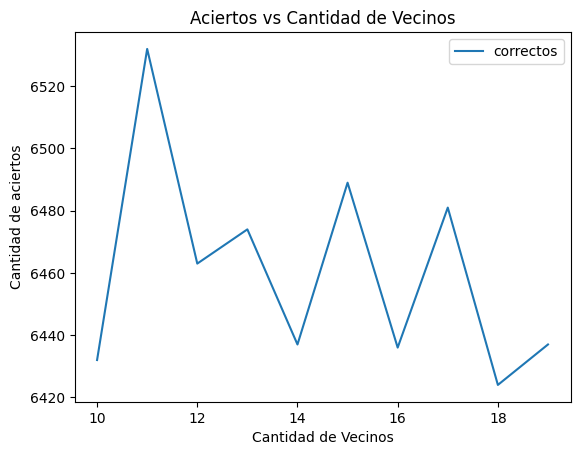

In [18]:
# ploteamos

df_metrics = pd.DataFrame(metrics, columns=['cant_vecinos', 'correctos'])

ax = df_metrics.plot( x='cant_vecinos',
                      y='correctos',
                      title='Aciertos vs Cantidad de Vecinos'
                     )

ax.set_ylabel("Cantidad de aciertos")
ax.set_xlabel("Cantidad de Vecinos")
plt.show()

Variamos la cantidad de Vecino, para mejorar el accuracy

In [19]:
from sklearn.model_selection import cross_val_score

k_range=range(10,20) #canidad de vecinos a probar

k_scores=[] # accuracy para cada K utilizado

for k in k_range:
    #clasificador Knn
    knn=KNeighborsClassifier(n_neighbors=k)
    #uso 10 folds
    scores=cross_val_score(knn,x_train,y_train,cv=7,scoring='accuracy')
    #promedio las 10 métricas
    k_scores.append(scores.mean())

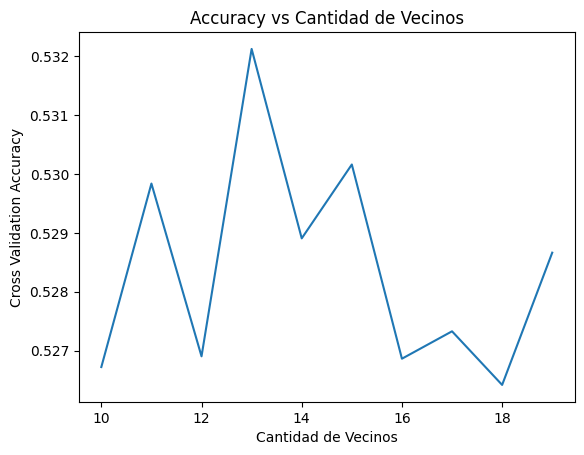

In [20]:
#ploteamos accuracy vs cantidad de vecinos
plt.plot(k_range, k_scores)
plt.xlabel('Cantidad de Vecinos')
plt.ylabel('Cross Validation Accuracy')
plt.title('Accuracy vs Cantidad de Vecinos')
plt.show()


###Cross Validation - Optimizando hiperparametros

In [21]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
from sklearn.neighbors import BallTree
from sklearn.neighbors import KDTree

#Métricas Válidas
VALID_METRICS = dict(
    ball_tree=BallTree.valid_metrics,
    kd_tree=KDTree.valid_metrics,
    # The following list comes from the sklearn.metrics.pairwise doc string
    brute=list(PAIRWISE_DISTANCE_FUNCTIONS.keys())
    + [ 'braycurtis','canberra','chebyshev','correlation',
        'cosine','dice','hamming','jaccard','kulsinski',
        'mahalanobis','matching','minkowski','rogerstanimoto',
        'russellrao','seuclidean','sokalmichener','sokalsneath',
        'sqeuclidean','yule','wminkowski',
    ],
)

#Ejemplo
for alg in VALID_METRICS:
    print(f'algoritmo: {alg}')
    print(VALID_METRICS[alg])
    print()

algoritmo: ball_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity', 'seuclidean', 'mahalanobis', 'hamming', 'canberra', 'braycurtis', 'jaccard', 'dice', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'haversine', 'pyfunc']

algoritmo: kd_tree
['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']

algoritmo: brute
['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed', 'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']



In [22]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(10,20),
              'weights':['distance','uniform'],
              'algorithm':['kd_tree'],
              'metric':['euclidean']
             }

#Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
rand = RandomizedSearchCV(knn, params_grid, cv=7, scoring='accuracy', n_iter=7, random_state=5)

rand.fit(x_train, y_train)
rand.cv_results_['mean_test_score']

array([0.53002188, 0.52698323, 0.52639575, 0.52872539, 0.53135889,
       0.52669962, 0.53018394])

In [23]:
#Mejores hiperparametros
print(rand.best_params_)
#Mejor métrica
print(rand.best_score_)

{'weights': 'distance', 'n_neighbors': 16, 'metric': 'euclidean', 'algorithm': 'kd_tree'}
0.5313588850174217


In [24]:
#Mejor estimador
best_knn=rand.best_estimator_

#Predicción con mejor estimador
y_pred=best_knn.predict(x_test)

#Accuracy test
accuracy_score(y_test,y_pred)

0.5277102576567817

              precision    recall  f1-score   support

           0       0.52      0.53      0.52      6066
           1       0.54      0.53      0.53      6276

    accuracy                           0.53     12342
   macro avg       0.53      0.53      0.53     12342
weighted avg       0.53      0.53      0.53     12342



Text(50.722222222222214, 0.5, 'True')

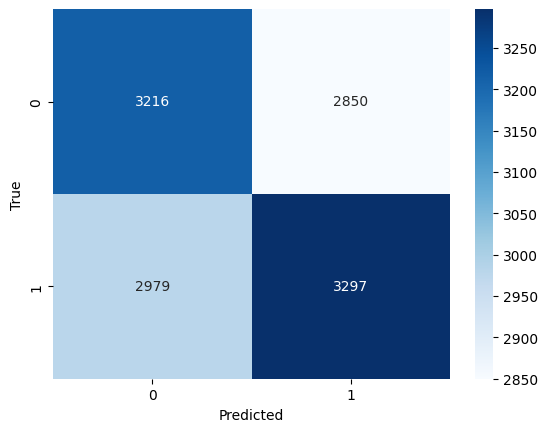

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

#Reporte de Clasificación
print(classification_report(y_test,y_pred))

#Matriz de Confusión
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

##Random Forest

In [26]:
import pandas as pd
import numpy as np

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
#import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, recall_score, accuracy_score,f1_score

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [27]:
rfc_default = RandomForestClassifier()
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
#Creamos un clasificador con hiperparámetros arbitrarios
rfc = RandomForestClassifier(oob_score=True,
                             random_state=1,
                             n_jobs=-1,
                             criterion="entropy",
                             min_samples_leaf=1,
                             min_samples_split=3,
                             n_estimators=1000 )
#Entrenamos el modelo
model = rfc.fit(X = x_train, y = y_train)

In [51]:
#Realizamos una predicción sobre el set de test
y_pred = model.predict(x_test)
#Valores Predichos
y_pred

array([1, 1, 0, ..., 0, 0, 0])

In [52]:
#Valores Reales
y_test.values

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
#Probemos verlos juntos en un DataFrame
ds_resultados=pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])
ds_resultados.head()

,test,pred
0,1,1
1,1,1
2,1,0
3,0,1
4,0,0


Text(50.722222222222214, 0.5, 'True')

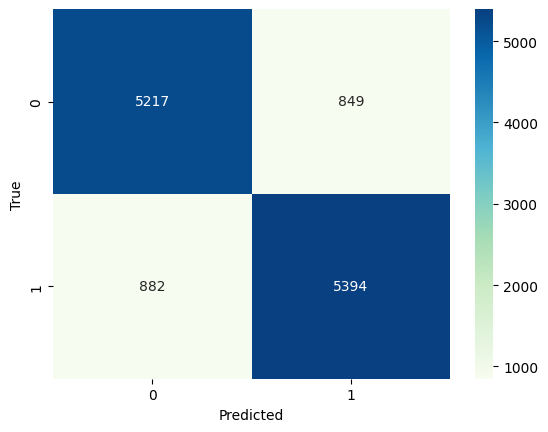

In [32]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [53]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))


#Reporte
print(classification_report(y_test,y_pred))

Accuracy: 0.8597472046669907
Recall: 0.8594646271510517
f1 score: 0.8617301701413851
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6066
           1       0.86      0.86      0.86      6276

    accuracy                           0.86     12342
   macro avg       0.86      0.86      0.86     12342
weighted avg       0.86      0.86      0.86     12342



###Grafico el Random Forest

In [34]:
model.classes_

array([0, 1])

In [35]:
model.estimators_[48]

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_split=3, random_state=1616579073)

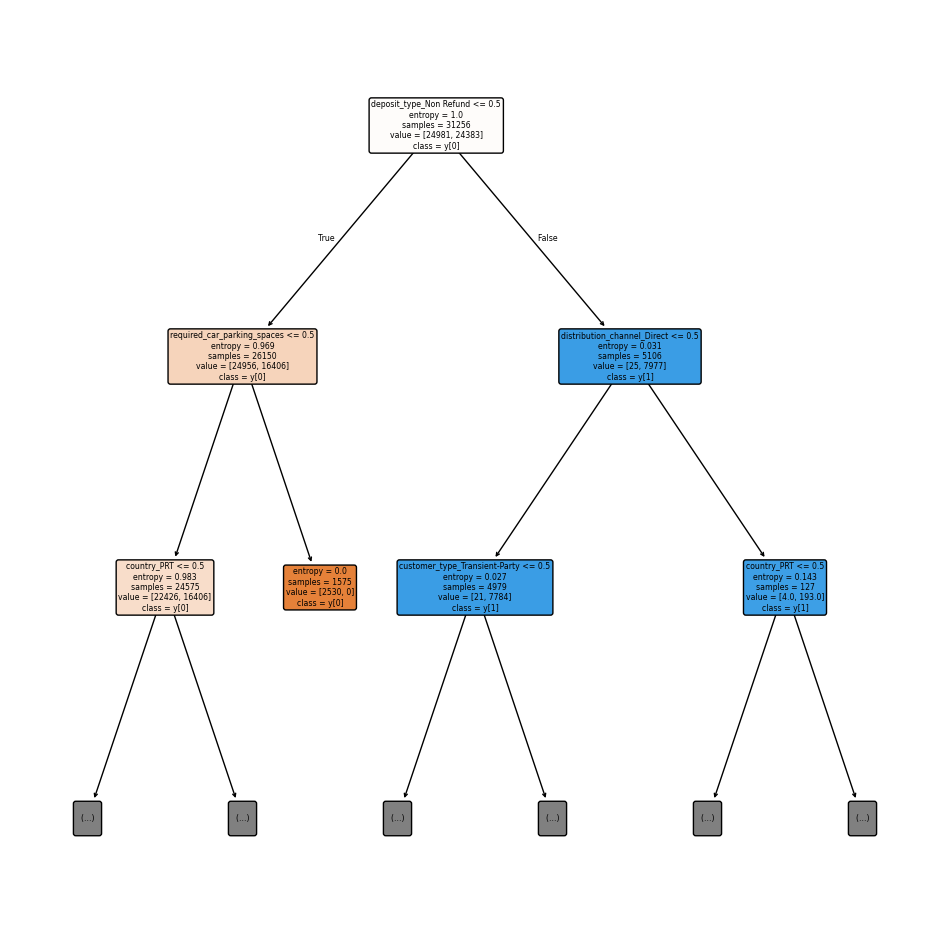

In [37]:
plt.figure(figsize=(12,12))

tree_plot=tree.plot_tree(model.estimators_[48],
                         max_depth=2,
                         feature_names=x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

###Cross Validation

Buscamos hiperparametros con GridSearch CV

In [39]:
rf_cv = RandomForestClassifier(max_features='sqrt', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"],
               "min_samples_leaf" : [1, 5, 10],
               "min_samples_split" : [2, 4, 10, 12, 16],
               "n_estimators": [10,20, 50] }

#Probamos entrenando sólo con 1 métrica
gs = GridSearchCV(estimator=rf_cv, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1)
gs_fit = gs.fit(X = x_train, y = y_train)

In [40]:
gs_fit.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

Mejor metrica

In [41]:
print("accuracy en entrenamiento con cv: "+str(gs_fit.best_score_))

accuracy en entrenamiento con cv: 0.8558868045572613


Predecimos utilizando el mejor modelo que obtuvimos en entrenamiento

In [42]:
#Obtenemos el mejor modelo
rf_cv_best=gs_fit.best_estimator_

#Predicción
y_pred_rf_cv_best = rf_cv_best.predict(x_test)

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      6066
           1       0.86      0.85      0.86      6276

    accuracy                           0.86     12342
   macro avg       0.86      0.86      0.86     12342
weighted avg       0.86      0.86      0.86     12342



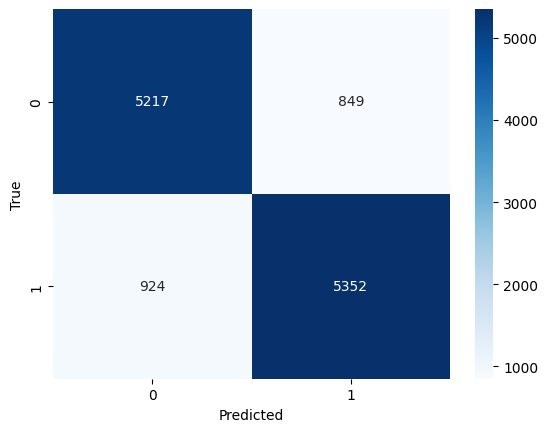

In [43]:
#Creo matriz de confusión
tabla=confusion_matrix(y_test,y_pred_rf_cv_best)

#Grafico matriz de confusión
sns.heatmap(tabla, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred_rf_cv_best))

In [44]:
#Evaluo la performance en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred_rf_cv_best)
recall=recall_score(y_test,y_pred_rf_cv_best)
f1=f1_score(y_test,y_pred_rf_cv_best)

print("Accuracy: "+str(accuracy))
print("Recall: "+str(recall))
print("f1 score: "+str(f1))

Accuracy: 0.8563441905687895
Recall: 0.8527724665391969
f1 score: 0.8578985333012743


##XGBoost

importo librerias

In [45]:
import pandas as pd
import numpy as np

import sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt
from six import StringIO
import pydotplus
from IPython.display import Image

from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

import warnings

In [46]:
#Creo el modelo y lo entreno

import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=0, n_estimators=100)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

AUC: 0.9394134905880229
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6066
           1       0.85      0.86      0.85      6276

    accuracy                           0.85     12342
   macro avg       0.85      0.85      0.85     12342
weighted avg       0.85      0.85      0.85     12342



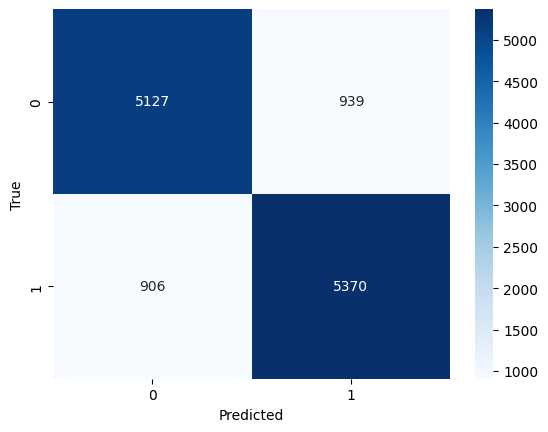

In [47]:
#Evaluo en el set de test
y_pred_proba= xgb_model.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

#Matriz de Confusion
y_pred=xgb_model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

In [48]:
#Datos de entrenamiento en formaro DMatrix
data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

#Entreno CV para probar el learning rate
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.1},num_boost_round=8,metrics='auc')
results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.876838,0.001585,0.875176,0.001894
1,0.885323,0.000716,0.884295,0.001054
2,0.886659,0.000755,0.885644,0.001287
3,0.887334,0.001230,0.886362,0.000989
4,0.889560,0.000647,0.888364,0.001567
5,0.892115,0.000754,0.891059,0.000977
6,0.894131,0.000983,0.893060,0.000684
7,0.896694,0.001688,0.895373,0.001899


In [49]:
#Entreno CV para probar el learning rate mas alto
results=xgb.cv(dtrain=data_dmatrix,nfold=5,params={'learning_rate':0.2},num_boost_round=8,metrics='auc',seed=0)
results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.876838,0.001585,0.875176,0.001894
1,0.886432,0.000800,0.885380,0.001285
2,0.891904,0.000560,0.890834,0.001059
3,0.896355,0.001404,0.895149,0.002059
4,0.901470,0.001467,0.899738,0.002059
5,0.903545,0.000850,0.902255,0.000345
6,0.905708,0.001263,0.904085,0.001061
7,0.908082,0.000907,0.906268,0.001286
